In [74]:
op="ycsb_e_init"

In [75]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../01_preprocess/'+op+'_new.csv')

#df.drop(['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz', 'task', 'IPC'], axis=1, inplace=True)
#df.drop(['nodeCount_Leaf', 'nodeCount_Inner', 'nodeCount_Dense', 'nodeCount_Hash', 'nodeCount_Head4', 'nodeCount_Head8', 'nodeCount_Dense2'], axis=1, inplace=True)

df.head()

,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,...,const_pageSizeLeaf,data_name,data_size,data_sorted,density,payload_size,rand_seed,ycsb_range_len,ycsb_zipf,time
0,dense3,16,1,1,0,1,0,0,0,1,...,8192,data/urls,4992374,0,0.815838,8,1706825744,100,1.254976,4.965867e-07
1,hints,16,1,0,0,0,0,0,0,1,...,2048,data/urls,2626244,0,0.795779,8,1706825754,100,0.593606,4.162030e-07
2,hash,16,1,0,0,0,1,0,0,1,...,4096,data/urls,2697613,0,0.722769,8,1706825798,100,0.782464,3.329775e-07
3,dense3,16,1,1,0,1,0,0,0,1,...,4096,data/urls,5182350,0,0.552645,8,1706825812,100,1.335837,4.798930e-07
4,hash,16,1,0,0,0,1,0,0,1,...,8192,data/urls,3904135,0,0.587902,8,1706825835,100,1.023279,3.448148e-07


In [76]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(['object']).columns

print("Number of columns:", df.shape[1])

# Apply one-hot encoding to non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns)

print("Number of columns after one-hot:", df.shape[1])

Number of columns: 27
Number of columns after one-hot: 29


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Split the dataframe into features (X) and target (y)
X = df.drop('time', axis=1)
y = df['time']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a random forest regressor
reg = RandomForestRegressor()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict the percentile brackets for the test data
y_pred = reg.predict(X_test)

# Evaluate the performance of the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("MSE:",mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



MSE: 1.6831643100676467e-16
R-squared: 0.9412434761573584


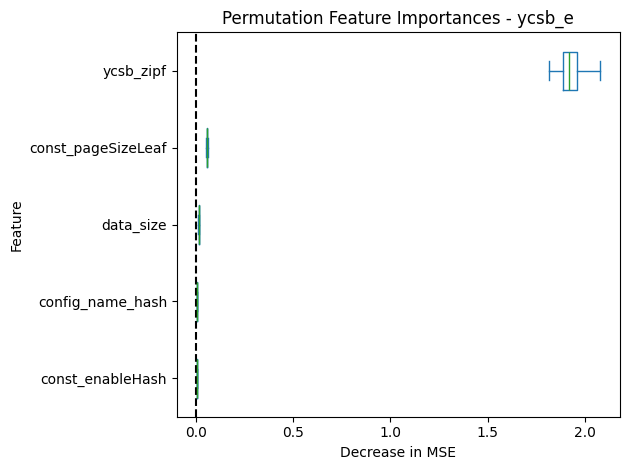

In [67]:
from sklearn.inspection import permutation_importance

# Calculate the feature importances
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
#get the top 5 importances
importances_filtered = importances.loc[:, importances.mean() > 0.001]

ax = importances_filtered.plot.box(vert=False, whis=10)
ax.set_title("Permutation Feature Importances - "+op)
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in MSE")
ax.set_ylabel("Feature")
ax.figure.tight_layout()

In [65]:
importances_filtered

,rand_seed,const_enableDensifySplit,const_enableDense,const_enableBasicHead,const_enableDense2,const_enableHashAdapt,const_enableHeadNode,const_basicHintCount,const_hashUseSimd,const_hashSimdWidth,...,payload_size,density,config_name_hints,config_name_dense3,const_pageSizeInner,const_enableHash,config_name_hash,data_size,const_pageSizeLeaf,ycsb_zipf
0,1.887512e-11,-1.541088e-11,-1.750784e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.291931e-11,7.437660e-12,3.509689e-11,7.863621e-11,7.939363e-09,9.442995e-09,1.685523e-08,3.985816e-08,2.996773e-07
1,-1.643442e-10,-2.262682e-11,-2.792441e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.372139e-11,6.483667e-12,8.629417e-12,1.994726e-10,8.759608e-09,1.035197e-08,1.712167e-08,3.786867e-08,3.097435e-07
2,-7.534432e-11,-9.925871e-12,-7.982526e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-9.295292e-11,2.372840e-11,9.803372e-12,1.801183e-10,8.110645e-09,9.580549e-09,1.652945e-08,3.928203e-08,2.842787e-07
3,-2.795751e-11,-5.943438e-12,1.007096e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.070892e-12,1.968097e-11,2.185828e-11,1.634383e-10,9.108356e-09,1.065163e-08,1.563157e-08,3.847267e-08,2.774648e-07
4,-7.200229e-11,-8.100017e-12,-1.949707e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.466563e-11,8.907550e-12,7.409727e-12,1.738156e-10,8.579795e-09,1.021994e-08,1.565624e-08,3.665802e-08,2.780172e-07
5,1.129936e-11,-1.437007e-11,-1.147070e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.649955e-11,1.230075e-11,4.814648e-12,2.060151e-10,7.873987e-09,9.378897e-09,1.611388e-08,3.659009e-08,2.912863e-07
6,-1.851700e-11,-1.586631e-11,-1.083511e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.428786e-11,1.869090e-11,2.580512e-11,1.995360e-10,7.982228e-09,9.307988e-09,1.592697e-08,3.630368e-08,2.889030e-07
7,-1.071863e-10,-9.808809e-13,1.487612e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.282264e-11,2.005075e-11,2.708901e-11,1.758292e-10,8.104396e-09,9.542852e-09,1.570803e-08,3.830280e-08,2.908310e-07
8,-2.133829e-11,-6.867072e-12,-2.646185e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.355974e-11,3.928400e-12,3.497945e-11,1.542113e-10,8.052217e-09,9.620928e-09,1.615640e-08,3.480073e-08,2.946912e-07
9,7.438749e-11,-8.815552e-12,-8.865902e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.027029e-10,1.697803e-11,1.928547e-11,1.936447e-10,9.157459e-09,1.045014e-08,1.636785e-08,3.705410e-08,2.874869e-07


In [78]:
explainer = shap.Explainer(reg)
shap_values = explainer.shap_values(X_test)

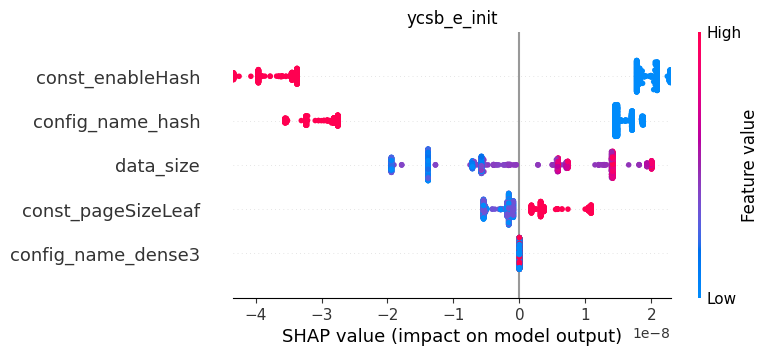

In [79]:
import matplotlib.pyplot as plt
features=X.columns
shap.summary_plot(shap_values,X_test,feature_names=features, max_display=5, show=False)
ax = plt.gca()

#get minimum and maximum shap_value
shap_min, shap_max = shap_values.min(), shap_values.max()
# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(shap_min, shap_max) 
plt.title(op)
plt.show()

In [50]:
print("Done")

Done


In [ ]:
import shap

# compute SHAP values
explainer = shap.KernelExplainer(reg.predict,shap.sample(X_train, 15))
shap_values = explainer.shap_values(X_test,nsamples=100)
